ADD IN BRIEF HISTORY OF GAMING HERE

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen 
import pandas as pd
import matplotlib.pyplot as plt
import re
import scipy.stats
import numpy as np
import seaborn as sns

%matplotlib inline

## Getting game reviews (ordered from best to worst, 158 pages total)

In [5]:
User_Agent = "Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"

In [6]:
url = 'https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?sort=desc&page=0'

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers={'User-Agent':user_agent,} 
request=urllib.request.Request(url,None,headers) 
response = urllib.request.urlopen(request)
data = response.read()

In [7]:
soup = BeautifulSoup(data, 'lxml')

In [8]:
import time

In [10]:

df = pd.DataFrame(columns=["title", "platform","critic_score", "user_score", "release_date"])

for page in range(157):
    url = 'https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?sort=desc&page=' + str(page)

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers={'User-Agent':user_agent,} 
    request=urllib.request.Request(url,None,headers) 
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'lxml')
    print(page)
    for games in soup.find_all('div', {'class':['product_row game', 'product_row game first']}):
        title_and_platform = games.find('div', class_='product_item product_title').find('a').text    
        title_and_platform = str(title_and_platform).replace("  ", "") # removes any spaces more than one in a row
        title = re.findall('(.*?)\n', title_and_platform)[1] # takes the second line, which is the title
        platform = (re.findall('\n\((.*?)\)', title_and_platform))[0]
        critic_score = games.find('div', class_='product_item product_score').text
        critic_score = str(critic_score).replace("  ", "") # removes any spaces more than one in a row
        critic_score = str(critic_score).replace('\n', "") # removes any new lines
        user_score = games.find('span', attrs = {"class": re.compile("(data textscore .*?)")}).text     
        # user_score = games.find('div', attrs = {"class": "product_item product_userscore_txt"}).find('span', attrs = {"class": re.compile("(data textscore .*?)")}).contents # this works equally well, and is a more careful coding in case "data textscore" was reused somewhere else
        if user_score != 'tbd':
            user_score = int(float(str(user_score))*10) # The critic scores are out of 100, while the user scores are out of 10 - normalize them here
        release_date = games.find('div', class_='product_item product_date').text
        release_date = str(release_date).replace("  ", "") # removes any spaces more than one in a row
        release_date = str(release_date).replace('\n', "") # removes any new lines
        df = df.append({"title":title, "platform":platform, "critic_score": critic_score, "user_score": user_score, "release_date": release_date}, ignore_index=True) 
    time.sleep(3)
df.head() 
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156


,title,platform,critic_score,user_score,release_date
0,The Legend of Zelda: Ocarina of Time,N64,99,91,"Nov 23, 1998"
1,Tony Hawk's Pro Skater 2,PS,98,74,"Sep 20, 2000"
2,Grand Theft Auto IV,PS3,98,75,"Apr 29, 2008"
3,SoulCalibur,DC,98,87,"Sep 8, 1999"
4,Grand Theft Auto IV,X360,98,79,"Apr 29, 2008"


In [12]:
#df.to_csv("/Users/richardmason/DSI/Capstone/metacritic_games.csv")

## So here we have 15,543... all of the games from all platforms in metacritic's database

## Next, we should attempt to scrape the remaining game data from metacritic

## First, the list of All Game Publishers

In [53]:

df = pd.DataFrame(columns = ['studio', 'number_published', 'average_score'])
for page in range(130):
    url = 'https://www.metacritic.com/browse/games/company/reviewed?page=' + str(page)

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers={'User-Agent':user_agent,} 
    request=urllib.request.Request(url,None,headers) 
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'lxml')
    print(page)
    for publishers in soup.find_all('div', {'class':'product_wrap'}):
        studio = publishers.find('a').text
        number_published = int(publishers.find('span').text.replace('\r', '').replace('\n', '').replace(' ','')[0]) # I found this the most intuitive way to remove all the whitespace, other methods such as .strip() were insufficient
        average_score = int(publishers.find('strong').text[15:17]) # Again this may look cumbersum but found it to be by far the quickest, most intuitive method for getting only the numbers from the string
        
        df = df.append({'studio': studio, 'number_published': number_published, 
                       'average_score': average_score}, ignore_index=True) 
    time.sleep(5)
df.head() 
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129


,studio,number_published,average_score
0,Pine Street Codeworks LLC,1,95
1,2D Boy,4,94
2,Draknek,1,93
3,Number None Inc.,3,92
4,Sirvo LLC,1,92


In [54]:
#df.to_csv("/Users/richardmason/DSI/Capstone/metacritic_publishers.csv")

## And... the list of all publications that make game reviews on metacritic...


In [69]:
df = pd.DataFrame(columns = ['publication', 'number_reviews', 'average_score'])
for page in range(18):
    url = 'https://www.metacritic.com/browse/games/publication/reviewed?page=' + str(page)

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers={'User-Agent':user_agent,} 
    request=urllib.request.Request(url,None,headers) 
    response = urllib.request.urlopen(request)
    data = response.read()
    soup = BeautifulSoup(data, 'lxml')
    print(page)
    for publications in soup.find_all('div', {'class':'product_wrap'}):
        publication = publications.find('a').text
        number_reviews = int(publications.find('span').text.replace('\r', '').replace('\n', '').replace(' ','')[0]) # I found this the most intuitive way to remove all the whitespace, other methods such as .strip() were insufficient
        average_score = int(publications.find('strong').text[22:24]) # Again this may look cumbersum but found it to be by far the quickest, most intuitive method for getting only the numbers from the string
        
        df = df.append({'publication': publication, 'number_reviews': number_reviews, 
                       'average_score': average_score}, ignore_index=True) 
    time.sleep(5)
df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


,publication,number_reviews,average_score
0,Action Trip,1,88
1,Absolute Playstation,9,88
2,GameScience,2,88
3,AppAdvice,6,86
4,Voodoo Extreme,6,85


In [70]:
df.to_csv("/Users/richardmason/DSI/Capstone/metacritic_publications.csv")

In [4]:
df = pd.read_csv('./metacritic_games.csv', index_col = 0)

In [5]:
df.head()

,title,platform,critic_score,user_score,release_date
0,The Legend of Zelda: Ocarina of Time,N64,99,91,"Nov 23, 1998"
1,Tony Hawk's Pro Skater 2,PS,98,74,"Sep 20, 2000"
2,Grand Theft Auto IV,PS3,98,75,"Apr 29, 2008"
3,SoulCalibur,DC,98,87,"Sep 8, 1999"
4,Grand Theft Auto IV,X360,98,79,"Apr 29, 2008"


## Let's perform some EDA on our games dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15543 entries, 0 to 15542
Data columns (total 5 columns):
title           15543 non-null object
platform        15543 non-null object
critic_score    15543 non-null int64
user_score      15543 non-null object
release_date    15543 non-null object
dtypes: int64(1), object(4)
memory usage: 728.6+ KB


1370 of the games have no user_score, aka the user_score is 'tbd.'  I think dropping these rows is the best approach

In [18]:
df['user_score'].replace('tbd', np.NaN, inplace = True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14173 entries, 0 to 15542
Data columns (total 5 columns):
title           14173 non-null object
platform        14173 non-null object
critic_score    14173 non-null int64
user_score      14173 non-null object
release_date    14173 non-null object
dtypes: int64(1), object(4)
memory usage: 664.4+ KB


Now we can properly convert the user_score values into integers

In [21]:
df['user_score'] = df['user_score'].astype(int)

In [ ]:
sns.set()
sns.set_context('talk')

In [141]:
sns.set_style('ticks')

So There is some correlation between user and critic score, but only a moderate one

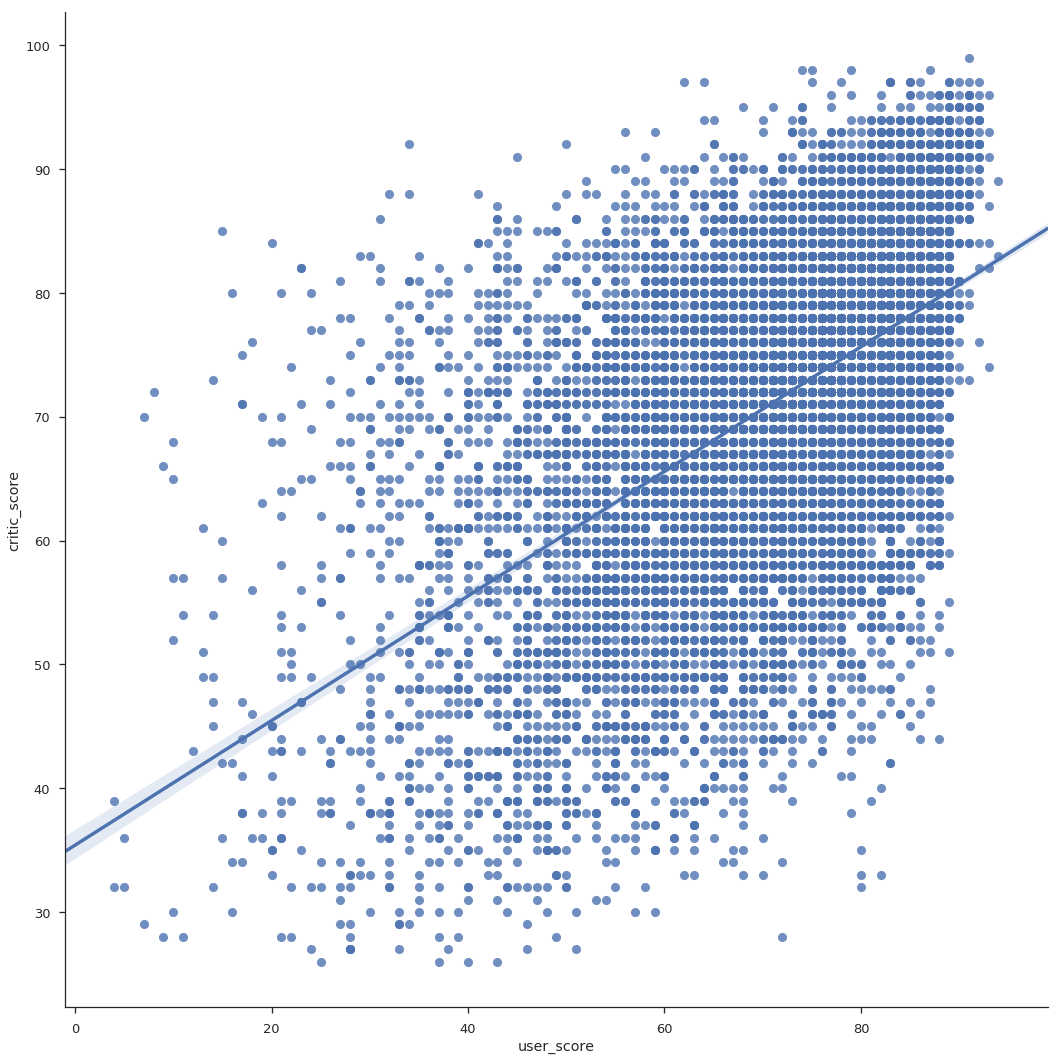

In [146]:

sns.lmplot('user_score', 'critic_score', data=df, size = 15)

In [31]:
df.corr()

,critic_score,user_score
critic_score,1.000000,0.547184
user_score,0.547184,1.000000


Let's look at the distributions of each so we can get a clearer picture

count    14173.000000
mean        71.020320
std         12.391078
min         26.000000
25%         64.000000
50%         73.000000
75%         80.000000
max         99.000000
Name: critic_score, dtype: float64


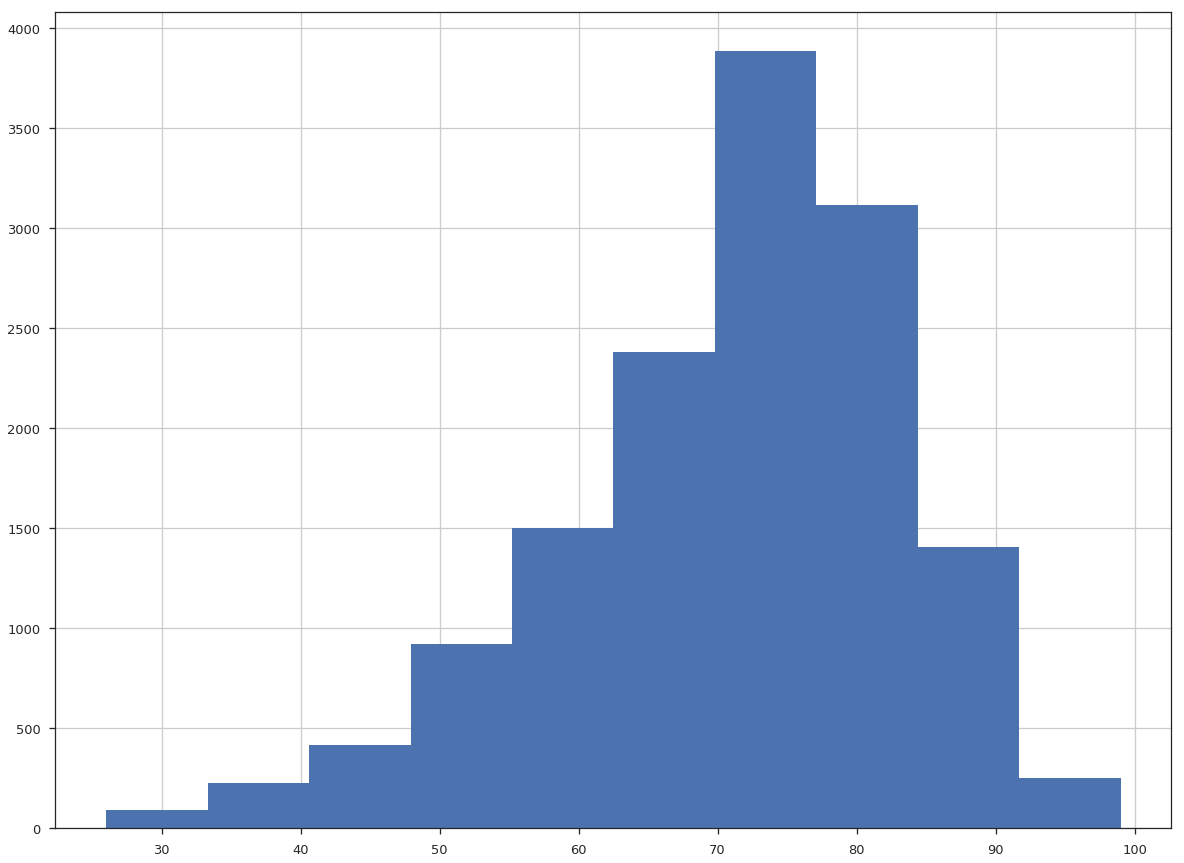

In [147]:
plt.figure(figsize = (17, 13))
df['critic_score'].hist()
print(df['critic_score'].describe())

count    14173.000000
mean        70.805616
std         13.477162
min          4.000000
25%         64.000000
50%         74.000000
75%         81.000000
max         94.000000
Name: user_score, dtype: float64


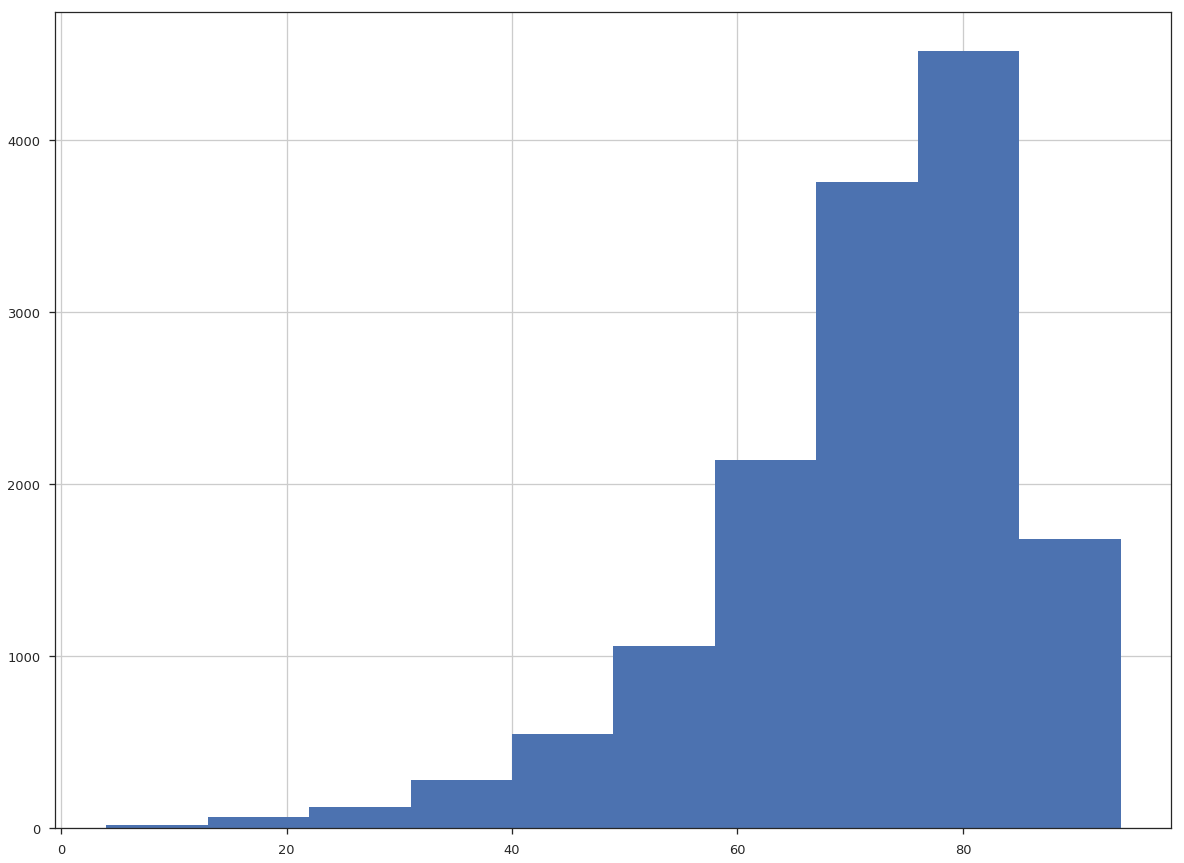

In [148]:
plt.figure(figsize = (17, 13))
df['user_score'].hist()
print(df['user_score'].describe())

Let's also convert the dates into a proper datetime index

Just come back to datetime's later!

In [68]:
df.head()

,title,platform,critic_score,user_score,release_date
0,The Legend of Zelda: Ocarina of Time,N64,99,91,"Nov 23, 1998"
1,Tony Hawk's Pro Skater 2,PS,98,74,"Sep 20, 2000"
2,Grand Theft Auto IV,PS3,98,75,"Apr 29, 2008"
3,SoulCalibur,DC,98,87,"Sep 8, 1999"
4,Grand Theft Auto IV,X360,98,79,"Apr 29, 2008"


In [132]:
platform_mean = df.groupby('platform').mean()

In [136]:
platform_mean

,critic_score,user_score
platform,,
3DS,69.938503,70.852941
DC,77.489362,79.542553
DS,68.456722,71.471455
GBA,71.204152,77.062284
GC,72.139108,75.480315
N64,79.691176,81.338235
PC,71.894305,70.495099
PS,76.296053,79.526316
PS2,69.663529,76.579608


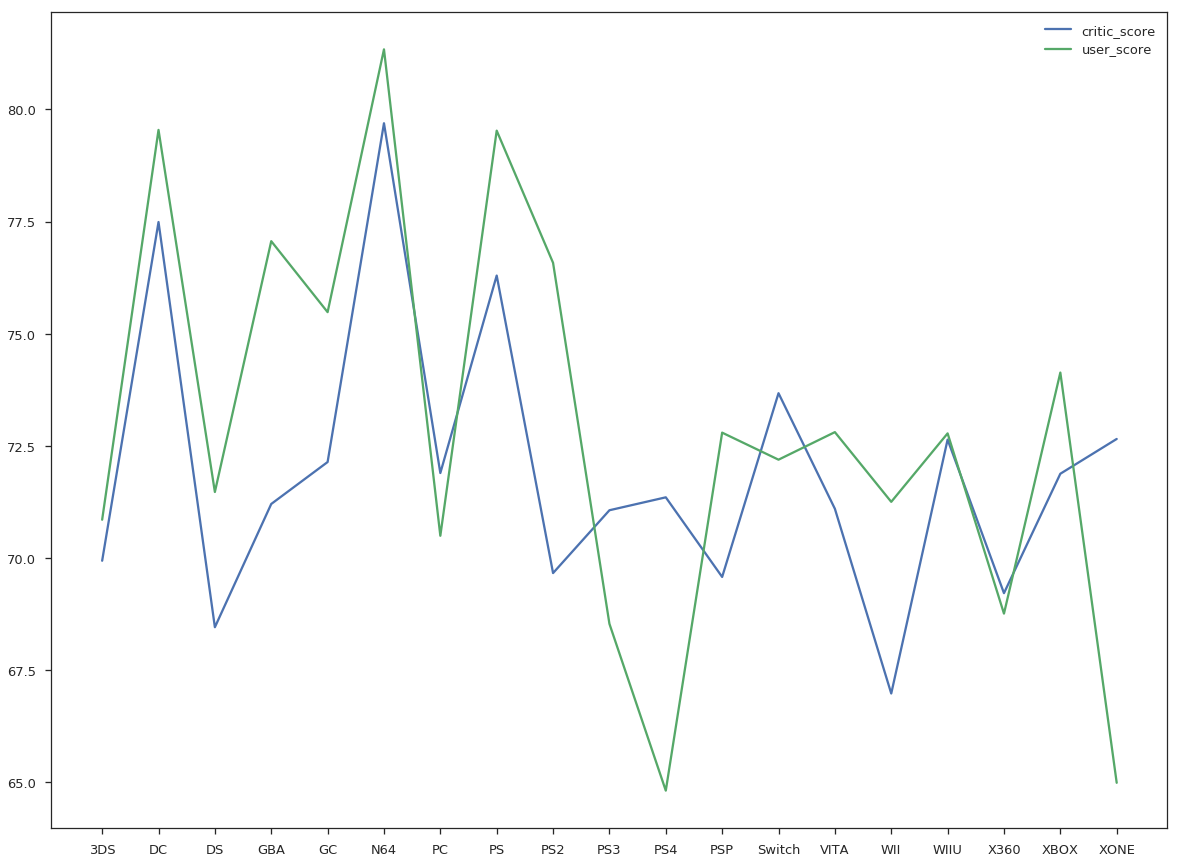

In [150]:
plt.figure(figsize=(20,15))
plt.plot(platform_mean['critic_score'], label='critic_score')
plt.plot(platform_mean['user_score'], label='user_score')
plt.legend();

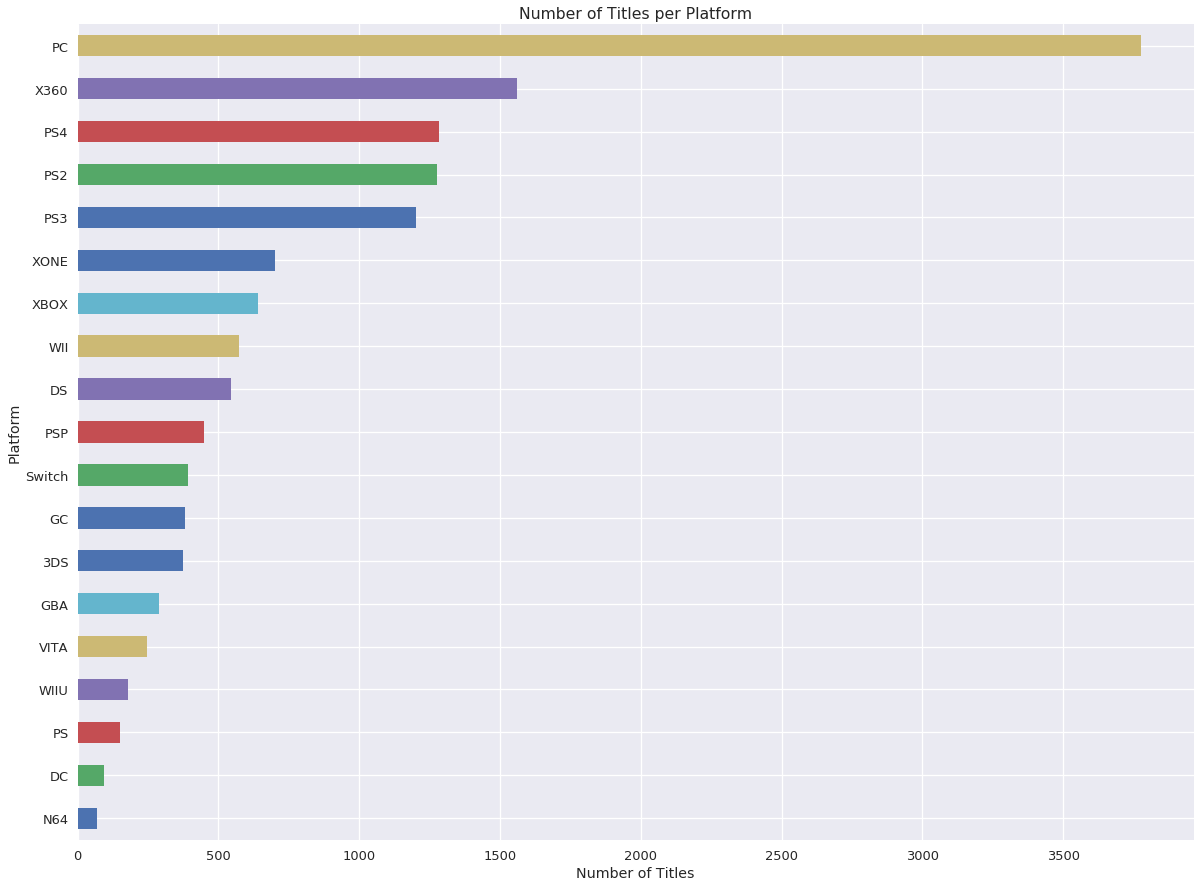

In [129]:
plt.figure(figsize=(20,15))
df['platform'].value_counts(ascending = True).plot.barh()
plt.title('Number of Titles per Platform')
plt.ylabel('Platform')
plt.xlabel('Number of Titles');

Finally converting the release dates into a proper datetime index

In [155]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14173 entries, 0 to 15542
Data columns (total 5 columns):
title           14173 non-null object
platform        14173 non-null object
critic_score    14173 non-null int64
user_score      14173 non-null int64
release_date    14173 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 664.4+ KB


First, plot critic_score vs. time

In [182]:
games_date = df.set_index('release_date')

In [183]:
games_date.head()

,title,platform,critic_score,user_score
release_date,,,,
1998-11-23,The Legend of Zelda: Ocarina of Time,N64,99,91
2000-09-20,Tony Hawk's Pro Skater 2,PS,98,74
2008-04-29,Grand Theft Auto IV,PS3,98,75
1999-09-08,SoulCalibur,DC,98,87
2008-04-29,Grand Theft Auto IV,X360,98,79


In [186]:
games_date.sort_index(inplace = True)

In [187]:
games_date.head()

,title,platform,critic_score,user_score
release_date,,,,
1995-04-30,Full Throttle,PC,86,88
1996-01-29,Duke Nukem 3D,PC,89,88
1996-02-29,Sid Meier's Civilization II,PC,94,89
1996-02-29,Bad Mojo,PC,74,69
1996-03-30,Resident Evil,PS,91,91


In [220]:
games_date.groupby(games_date.index).mean()[['critic_score']]

,critic_score
release_date,
1995-04-30,86.000000
1996-01-29,89.000000
1996-02-29,84.000000
1996-03-30,91.000000
1996-06-22,94.000000
1996-07-31,80.000000
1996-08-25,89.000000
1996-08-31,53.000000
1996-09-26,94.000000


In [226]:
games_date.groupby(games_date.index.year).mean()[['critic_score']]

,critic_score
release_date,
1995,86.000000
1996,85.526316
1997,85.185185
1998,83.238095
1999,84.280000
2000,74.982143
2001,73.178330
2002,71.927302
2003,71.798867


In [229]:
games_date.groupby('platform').mean()[['critic_score']]

,critic_score
platform,
3DS,69.938503
DC,77.489362
DS,68.456722
GBA,71.204152
GC,72.139108
N64,79.691176
PC,71.894305
PS,76.296053
PS2,69.663529


By Year

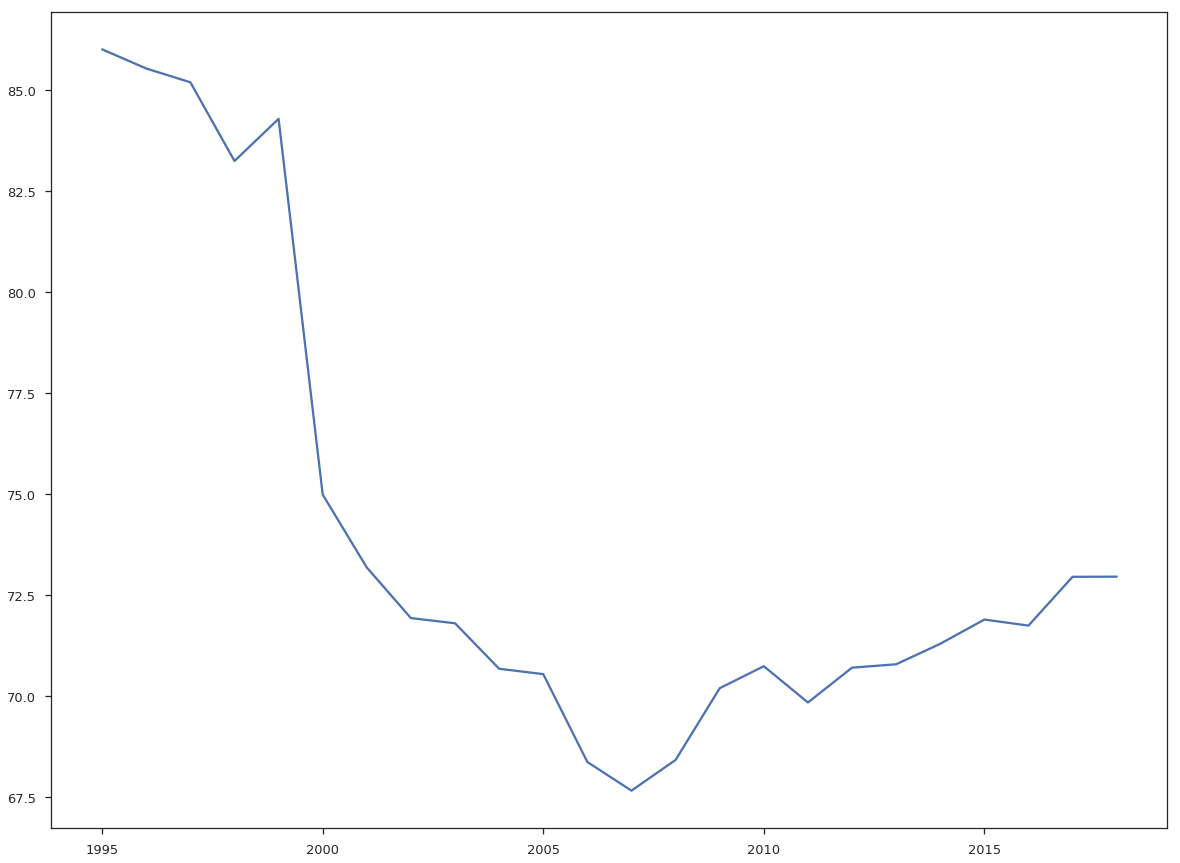

In [211]:
plt.figure(figsize=(20,15))
plt.plot(games_date.groupby(games_date.index.year).mean()[['critic_score']])

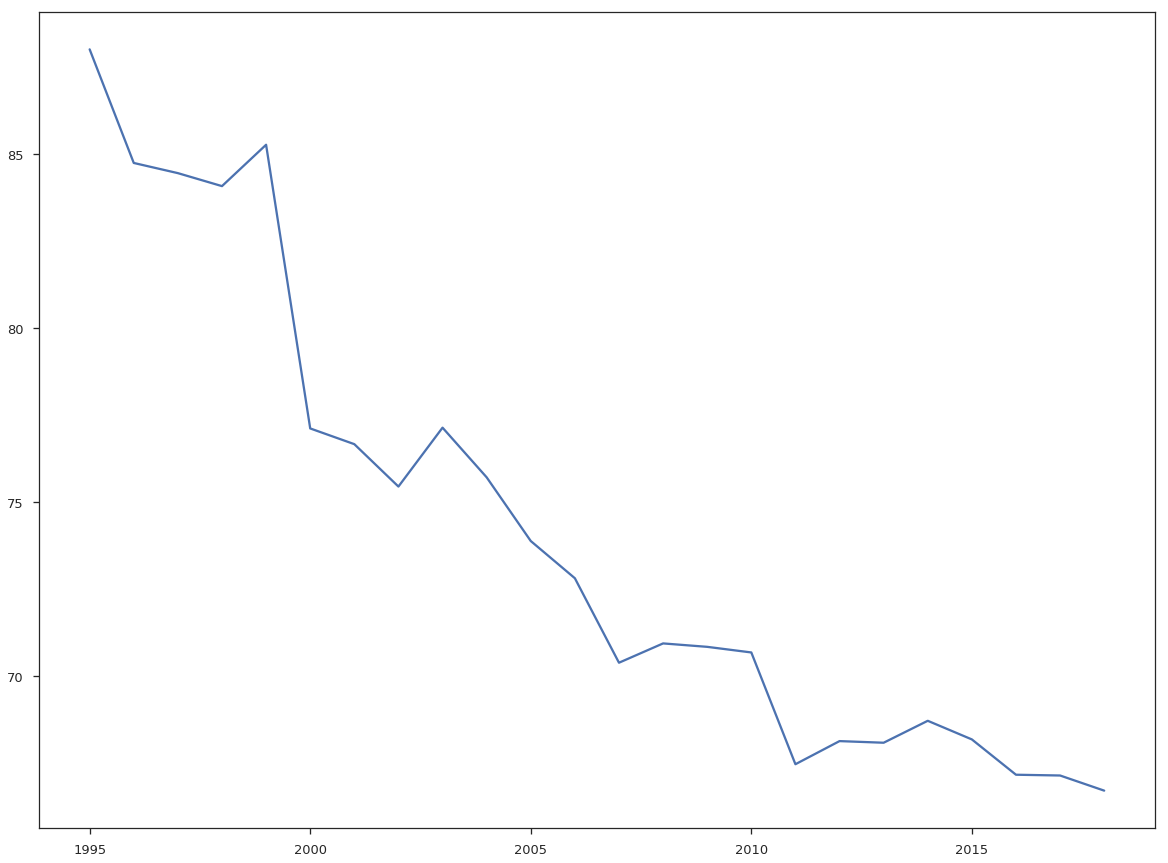

In [212]:
plt.figure(figsize=(20,15))
plt.plot(games_date.groupby(games_date.index.year).mean()[['user_score']])

# IDEA FOR LATER: track reviews through time AND by platform???!

In [9]:
df_publishers = pd.read_csv('./metacritic_publishers.csv', index_col = 0)

In [10]:
df_publishers.head()

,studio,number_published,average_score
0,Pine Street Codeworks LLC,1,95
1,2D Boy,4,94
2,Draknek,1,93
3,Number None Inc.,3,92
4,Sirvo LLC,1,92


In [230]:
df_publishers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3864 entries, 0 to 3863
Data columns (total 3 columns):
studio              3864 non-null object
number_published    3864 non-null int64
average_score       3864 non-null int64
dtypes: int64(2), object(1)
memory usage: 120.8+ KB


In [11]:
df_publications = pd.read_csv('./metacritic_publications.csv', index_col = 0)

In [12]:
df_publications.head()

,publication,number_reviews,average_score
0,Action Trip,1,88
1,Absolute Playstation,9,88
2,GameScience,2,88
3,AppAdvice,6,86
4,Voodoo Extreme,6,85
